# Curva ROC

Genero los dos datasets gaussianos:

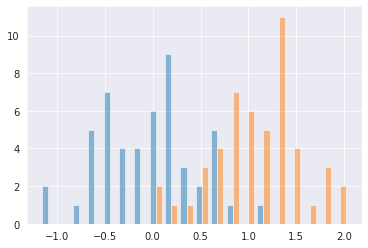

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

m1 = 0
m2 = 1
std1 = 0.5
std2 = 0.5
N1 = 50
N2 = 50

d1 = np.random.normal(m1, std1, N1)
d2 = np.random.normal(m2, std2, N2)

sns.set_style('darkgrid')
fig = plt.hist([d1, d2], bins=20, color=['tab:blue','tab:orange'], alpha=0.5)

Genero un DataFrame con los datos y los ordeno segun su valor:

In [302]:
df = pd.concat([pd.DataFrame({'value':d1, 'dataset':['d1']*len(d1)}), pd.DataFrame({'value':d2, 'dataset':['d2']*len(d2)})], axis=0, ignore_index=True)
df.sort_values('value', inplace=True, ignore_index=True)
df

,value,dataset
0,-1.170110,d1
1,-1.068721,d1
2,-0.727176,d1
3,-0.677731,d1
4,-0.607667,d1
...,...,...
95,1.784740,d2
96,1.831068,d2
97,1.850467,d2
98,1.917413,d2


Genero la curva ROC y la grafico:

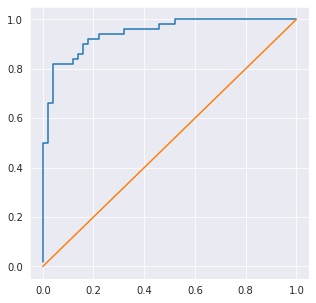

In [303]:
x_list, y_list = ([], [])
x, y = (0, 0)
for i in range(N1+N2):
    if df.iloc[-(1+i), 1] == 'd2':
        y += 1/N2
    else:
        x += 1/N1
    x_list.append(x)
    y_list.append(y)

plt.figure(1, (5,5))
plt.plot(x_list, y_list, [0,1], [0,1])

Para obtener mínimo error defino como umbral el valor que corresponde con el punto en la curva que está a mayor distancia de la recta identidad. Luego determino la predicción del modelo con el umbral calculado, determino el tipo de error de cada predicción y calculo las métricas TPR, FPR, PPV y F-score.

In [304]:
dist = np.abs(np.array(x_list) - np.array(y_list))/np.sqrt(2)
max_idx, = np.where(dist == dist.max())
thr = np.mean(df.iloc[-(1+max_idx), 0])

df['predicted'] = ['d1' if df.iloc[idx,0] < thr else 'd2' for idx in range(N1+N2)]
df['error_type'] = ['FP' if df.iloc[idx,1]=='d1' and df.iloc[idx,2]=='d2' else 
                    'FN' if df.iloc[idx,1]=='d2' and df.iloc[idx,2]=='d1' else 
                    'TP' if df.iloc[idx,1]=='d2' and df.iloc[idx,2]=='d2' else
                    'TN' for idx in range(N1+N2)]
fp, fn, tp, tn = [np.sum(df['error_type'] == error_type) for error_type in ['FP', 'FN', 'TP', 'TN']]

TPR = tp/(tp+fn)
FPR = fp/(fp+tn)
PPV = tp/(tp+fp)
f_score = 2*TPR*PPV/(TPR+PPV)

print('TPR:', np.round(TPR, 3))
print('FPR:', np.round(TPR, 3))
print('PPV:', np.round(PPV, 3))
print('F-score:', np.round(f_score, 3))

TPR: 0.82
FPR: 0.82
PPV: 0.953
F-score: 0.882


Probando diferentes valores de media y desviación estandar se vio que cuando las medias están más juntas o las desviaciones son más grandes, los datos están más mezclados. Esto hace que la curva ROC se parezca más a la identidad y que las métricas utilizadas disminuyan su valor.

Por otro lado, por cómo se calculó el umbral, el FPR y el TPR obtenidos son siempre iguales. Utilizando la curva ROC podrían definirse diferentes umbrales que cumplan con determinado valor de TPR, por ejemplo, aunque sin poder variar libremente el FPR en ese caso.

Finalmente, muestro el dataset para ver cómo fueron los valores predichos y los tipos de error:

In [305]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,value,dataset,predicted,error_type
0,-1.170110,d1,d1,TN
1,-1.068721,d1,d1,TN
2,-0.727176,d1,d1,TN
3,-0.677731,d1,d1,TN
4,-0.607667,d1,d1,TN
5,-0.601884,d1,d1,TN
6,-0.553857,d1,d1,TN
7,-0.533926,d1,d1,TN
8,-0.517388,d1,d1,TN
9,-0.485713,d1,d1,TN
